In [58]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import idx2numpy

from minisom import MiniSom

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

from bokeh.colors import RGB
from bokeh.io import curdoc, show, output_notebook
from bokeh.transform import factor_mark, factor_cmap
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_file

In [59]:
file = './samples/train-images-idx3-ubyte'
arr = idx2numpy.convert_from_file(file)
x_train = np.array(arr)
x_train
# arr is now a np.ndarray type of object of shape 60000, 28, 28

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [60]:
file = './samples/train-labels.idx1-ubyte'
arr = idx2numpy.convert_from_file(file)
y_train = np.array(arr)
y_train.shape
# arr is now a np.ndarray type of object of shape 60000, 28, 28

(60000,)

In [61]:
x_train.shape

(60000, 28, 28)

In [80]:
# normalizations
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_train.shape

(60000, 784)

In [81]:
row_sums = x_train.sum(axis=1)
x_train = x_train / row_sums[:, np.newaxis]
x_train.shape

(60000, 784)

In [64]:
y_train = np.reshape(y_train, (x_train.shape[0], -1))
y_train.shape

(60000, 1)

In [110]:
# initialization and training of 15x15 SOM
size = 15
som = MiniSom(size, size, x_train.shape[1], sigma=1, learning_rate=0.3, activation_distance='euclidean',
              topology='hexagonal', random_seed=10)

som.train(x_train, 100000, verbose=True)


 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.05044062254050433


In [111]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

In [113]:
umatrix.shape

(15, 15)

In [114]:
som.winner(x_train[1])

(12, 13)

# Plot clear cluster

In [115]:
x = []
y = []
z = []
for i in range(len(umatrix)):
    for j in range(len(umatrix[i, :])):
        x.append(i)
        y.append(j)
        z.append(umatrix[i, j])

x = np.array(x)
y = np.array(y)
z = np.array(z)


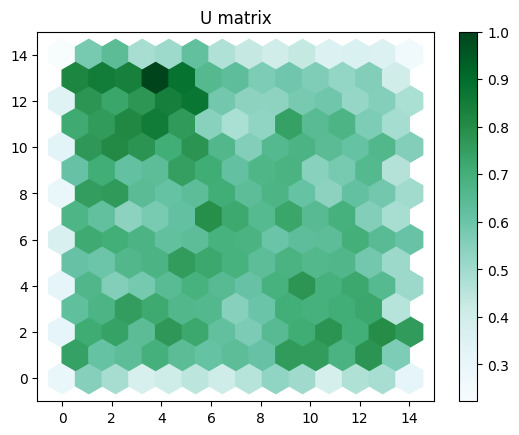

In [116]:
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

hb = plt.hexbin(x, y, gridsize=size-2,
                C=z, cmap='BuGn')

plt.xlim(xmin - 1, xmax + 1)
plt.ylim(ymin - 1, ymax + 1)

cb = plt.colorbar(hb)
# cb.set_label()
plt.title('U matrix')

plt.show()

# calc winners

In [117]:
from scipy import stats

In [118]:
print()

In [119]:
x_train.shape

(60000, 784)

In [120]:
y_train_list = y_train.tolist()
win_map = som.win_map(x_train, y_train_list)
win_map.keys()

dict_keys([(1, 5), (12, 13), (7, 7), (1, 8), (7, 2), (3, 7), (5, 14), (0, 4), (3, 14), (5, 2), (14, 8), (1, 0), (11, 9), (7, 12), (3, 13), (4, 1), (4, 8), (1, 6), (9, 11), (7, 0), (10, 13), (5, 1), (9, 12), (1, 7), (9, 3), (12, 8), (6, 8), (2, 0), (4, 11), (3, 5), (6, 12), (10, 11), (10, 14), (6, 13), (10, 12), (5, 10), (0, 14), (2, 4), (8, 0), (11, 7), (11, 5), (0, 1), (13, 6), (13, 9), (14, 13), (13, 0), (6, 0), (7, 3), (4, 4), (14, 14), (9, 7), (0, 9), (7, 8), (4, 3), (8, 12), (12, 12), (6, 6), (0, 0), (1, 11), (4, 12), (3, 2), (2, 13), (7, 13), (13, 7), (2, 9), (2, 10), (14, 11), (5, 8), (8, 11), (13, 2), (6, 2), (14, 12), (12, 0), (9, 5), (2, 5), (10, 0), (0, 10), (14, 2), (4, 13), (9, 10), (10, 5), (1, 14), (13, 14), (6, 5), (8, 3), (4, 9), (11, 12), (13, 13), (3, 8), (1, 13), (8, 13), (8, 1), (10, 7), (11, 8), (12, 11), (5, 3), (5, 0), (6, 4), (11, 6), (0, 5), (10, 4), (2, 12), (7, 5), (11, 13), (14, 1), (12, 4), (11, 11), (8, 8), (11, 3), (12, 2), (1, 1), (10, 2), (5, 7), (3, 1

In [122]:
final_vots = {}

for key in win_map.keys():
    id_list = win_map[key]
    votes = []
    for id in id_list:
        votes.append(y_train[id])

    # [0][0] just remove extra brackets over the result
    final_vot = stats.mode(votes)[0][0]
    final_vots[key] = final_vot[0]
# for pair in win_map.keys():

final_vots

{(1, 5): 5,
 (12, 13): 0,
 (7, 7): 4,
 (1, 8): 1,
 (7, 2): 9,
 (3, 7): 2,
 (5, 14): 1,
 (0, 4): 3,
 (3, 14): 1,
 (5, 2): 4,
 (14, 8): 3,
 (1, 0): 5,
 (11, 9): 3,
 (7, 12): 6,
 (3, 13): 1,
 (4, 1): 7,
 (4, 8): 2,
 (1, 6): 8,
 (9, 11): 6,
 (7, 0): 9,
 (10, 13): 0,
 (5, 1): 9,
 (9, 12): 6,
 (1, 7): 2,
 (9, 3): 4,
 (12, 8): 3,
 (6, 8): 2,
 (2, 0): 7,
 (4, 11): 2,
 (3, 5): 8,
 (6, 12): 6,
 (10, 11): 0,
 (10, 14): 5,
 (6, 13): 6,
 (10, 12): 0,
 (5, 10): 2,
 (0, 14): 1,
 (2, 4): 8,
 (8, 0): 9,
 (11, 7): 3,
 (11, 5): 8,
 (0, 1): 5,
 (13, 6): 3,
 (13, 9): 3,
 (14, 13): 0,
 (13, 0): 7,
 (6, 0): 7,
 (7, 3): 9,
 (4, 4): 8,
 (14, 14): 0,
 (9, 7): 4,
 (0, 9): 1,
 (7, 8): 9,
 (4, 3): 4,
 (8, 12): 6,
 (12, 12): 0,
 (6, 6): 4,
 (0, 0): 5,
 (1, 11): 1,
 (4, 12): 1,
 (3, 2): 7,
 (2, 13): 1,
 (7, 13): 6,
 (13, 7): 3,
 (2, 9): 2,
 (2, 10): 1,
 (14, 11): 0,
 (5, 8): 2,
 (8, 11): 6,
 (13, 2): 7,
 (6, 2): 9,
 (14, 12): 0,
 (12, 0): 7,
 (9, 5): 4,
 (2, 5): 8,
 (10, 0): 7,
 (0, 10): 1,
 (14, 2): 5,
 (4, 13): 1,

# Plot result of Clustering with label

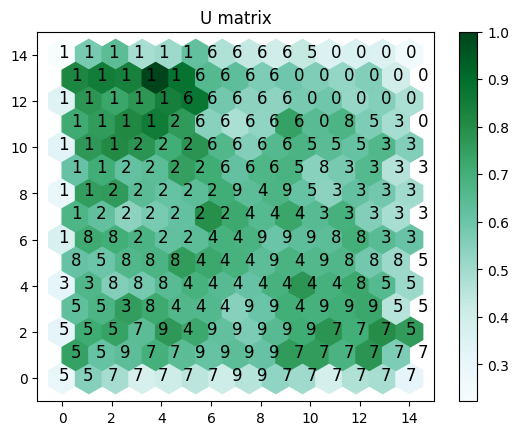

In [123]:
hb = plt.hexbin(x, y, gridsize=size -2,
                C=z, cmap='BuGn')

plt.xlim(xmin - 1, xmax + 1)
plt.ylim(ymin - 1, ymax + 1)

for key in final_vots.keys():
    i, j = key

    if j % 2 == 0:
        plt.text(i - 0.15, j - 0.1, final_vots[key], fontsize=12, color="black")
    else:
        plt.text(i - 0.15 + 0.5, j - 0.1, final_vots[key], fontsize=12, color="black")

cb = plt.colorbar(hb)
# cb.set_label()
plt.title('U matrix')

plt.show()

other word